In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ahu12 = pd.read_csv('AHU_12.csv')
ahu12 = ahu12.ffill()
ahu12.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13
0,31-12-2015,00:00:00,OFF,15.0,53.7,OFF,OFF,0.0,0.0,31.0,10.1,15.0,52.0
1,31-12-2015,00:01:34,OFF,15.0,53.7,OFF,OFF,0.0,0.0,31.0,10.1,15.0,52.0
2,31-12-2015,00:07:07,OFF,15.0,53.7,OFF,OFF,0.0,0.0,31.0,12.2,15.0,52.0
3,31-12-2015,00:07:32,OFF,15.0,53.7,OFF,OFF,0.0,0.0,31.0,12.2,15.0,52.0
4,31-12-2015,00:08:07,OFF,15.0,53.7,OFF,OFF,0.0,0.0,31.0,12.2,15.0,52.0


In [3]:
ahu12.rename(columns={'Column1':'Date','Column2':'Time','Column3':'supply fan ON?OFF','Column5':'Discharger temperature',
                      'Column6':'exhaust fans 1 ON?OFF','Column7':'exhaust fans 2 ON?OFF','Column8':'Humidity valve',
                      'Column9':'Mixed air damper % open','Column10':'Mixed air temperature','Column11':'Pre-heat valve % open',
                      'Column12':'Pre-heat valve minimum','Column13':'Return air temperature','Column4':'Cooling coil valve %open'},inplace = True)
ahu12.head()

,Date,Time,supply fan ON?OFF,Cooling coil valve %open,Discharger temperature,exhaust fans 1 ON?OFF,exhaust fans 2 ON?OFF,Humidity valve,Mixed air damper % open,Mixed air temperature,Pre-heat valve % open,Pre-heat valve minimum,Return air temperature
0,31-12-2015,00:00:00,OFF,15.0,53.7,OFF,OFF,0.0,0.0,31.0,10.1,15.0,52.0
1,31-12-2015,00:01:34,OFF,15.0,53.7,OFF,OFF,0.0,0.0,31.0,10.1,15.0,52.0
2,31-12-2015,00:07:07,OFF,15.0,53.7,OFF,OFF,0.0,0.0,31.0,12.2,15.0,52.0
3,31-12-2015,00:07:32,OFF,15.0,53.7,OFF,OFF,0.0,0.0,31.0,12.2,15.0,52.0
4,31-12-2015,00:08:07,OFF,15.0,53.7,OFF,OFF,0.0,0.0,31.0,12.2,15.0,52.0


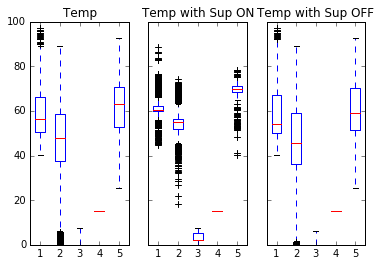

In [4]:
# temp
data_temp = [ahu12['Discharger temperature'],ahu12['Mixed air temperature'],ahu12['Humidity valve'],ahu12['Pre-heat valve minimum'],
             ahu12['Return air temperature']]
sup_on = ahu12[ahu12['supply fan ON?OFF'].str.contains('ON')]
sup_off = ahu12[ahu12['supply fan ON?OFF'].str.contains('OFF')]
data_temp_1 = [sup_on['Discharger temperature'],sup_on['Mixed air temperature'],sup_on['Humidity valve'],sup_on['Pre-heat valve minimum'],
            sup_on['Return air temperature']]
data_temp_2 = [sup_off['Discharger temperature'],sup_off['Mixed air temperature'],sup_off['Humidity valve'],sup_off['Pre-heat valve minimum'],
            sup_off['Return air temperature']]
f, (ax1,ax2,ax3) = plt.subplots(1,3,sharey = True)
ax1.boxplot(data_temp)
ax1.set_title('Temp')
ax2.boxplot(data_temp_1)
ax2.set_title('Temp with Sup ON')
ax3.boxplot(data_temp_2)
ax3.set_title('Temp with Sup OFF')
#plt.show()
plt.savefig(''.join(['Temp','_ahu12']))

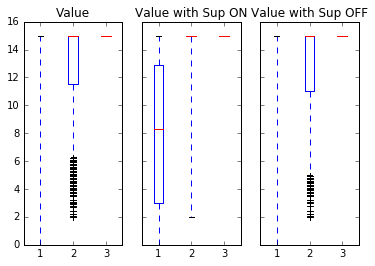

In [5]:
# value
data_value = [ahu12['Mixed air damper % open'],ahu12['Pre-heat valve % open'],ahu12['Cooling coil valve %open']]
data_value_1 = [sup_on['Mixed air damper % open'],sup_on['Pre-heat valve % open'],sup_on['Cooling coil valve %open']]
data_value_2 = [sup_off['Mixed air damper % open'],sup_off['Pre-heat valve % open'],sup_off['Cooling coil valve %open']]
f, (ax1,ax2,ax3) = plt.subplots(1,3,sharey = True)
ax1.boxplot(data_value)
ax1.set_title('Value')
ax2.boxplot(data_value_1)
ax2.set_title('Value with Sup ON')
ax3.boxplot(data_value_2)
ax3.set_title('Value with Sup OFF')
#plt.show()
plt.savefig(''.join(['Value','_ahu12']))

In [6]:
df1 = ahu12.copy()
df1 = df1.drop(['Date','Time','supply fan ON?OFF','exhaust fans 1 ON?OFF','exhaust fans 2 ON?OFF'],1)
ahu12.columns.values

array(['Date', 'Time', 'supply fan ON?OFF', 'Cooling coil valve %open',
       'Discharger temperature', 'exhaust fans 1 ON?OFF',
       'exhaust fans 2 ON?OFF', 'Humidity valve',
       'Mixed air damper % open', 'Mixed air temperature',
       'Pre-heat valve % open', 'Pre-heat valve minimum',
       'Return air temperature'], dtype=object)

C:\Users\MisraSN-PC\Anaconda2\lib\site-packages\matplotlib\axes\_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=15.0, right=15.0
  'left=%s, right=%s') % (left, right))
C:\Users\MisraSN-PC\Anaconda2\lib\site-packages\matplotlib\axes\_base.py:3045: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=15.0, top=15.0
  'bottom=%s, top=%s') % (bottom, top))


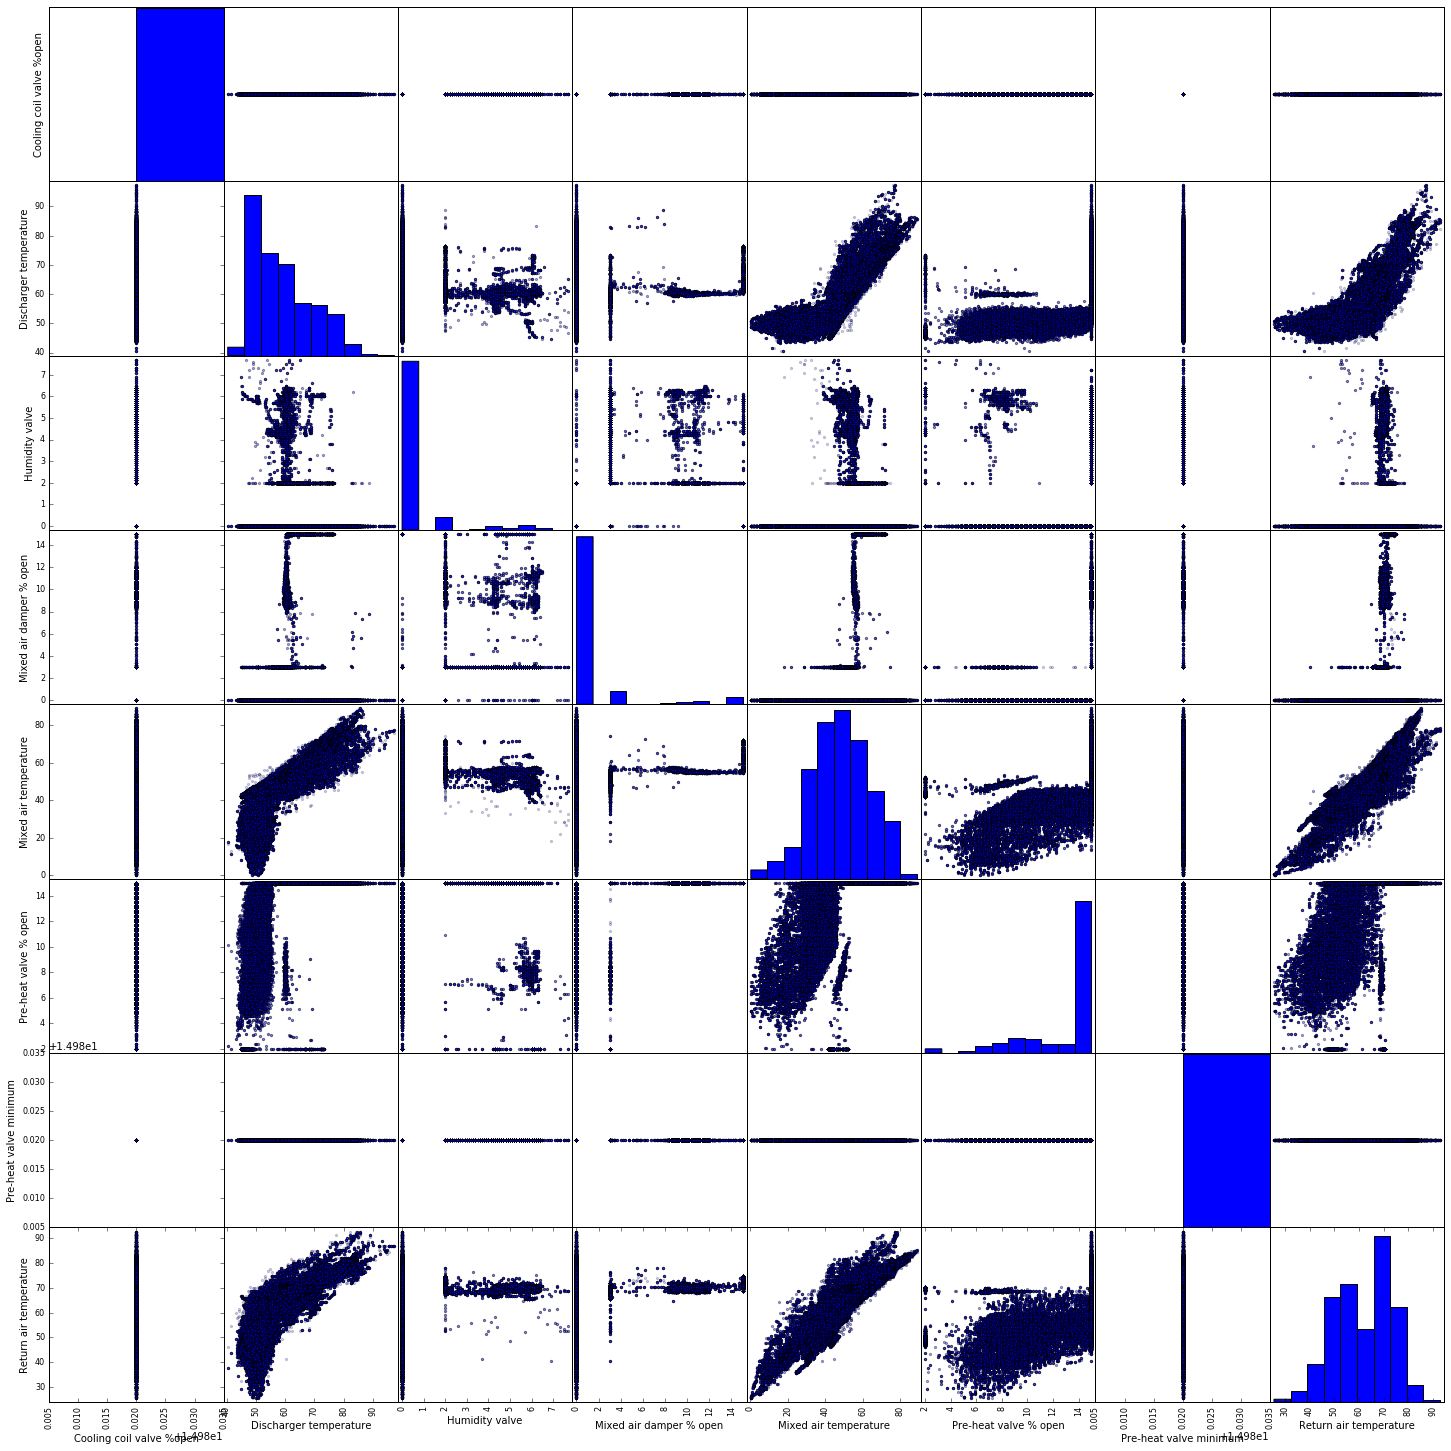

In [8]:
df = pd.scatter_matrix(df1, alpha = 0.2, figsize=(25,25))
plt.savefig(''.join(['bivariate','_ahu_12']))